# Dataset 1- São Paulo rent April/2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importa as bibliotecas que vão ser utilizadas

In [ ]:
data = pd.read_csv('sao-paulo-properties-april-2019.csv')
#importa o dataset que está armazenado nos arquivos deste notebook e o armazena em 'df'.

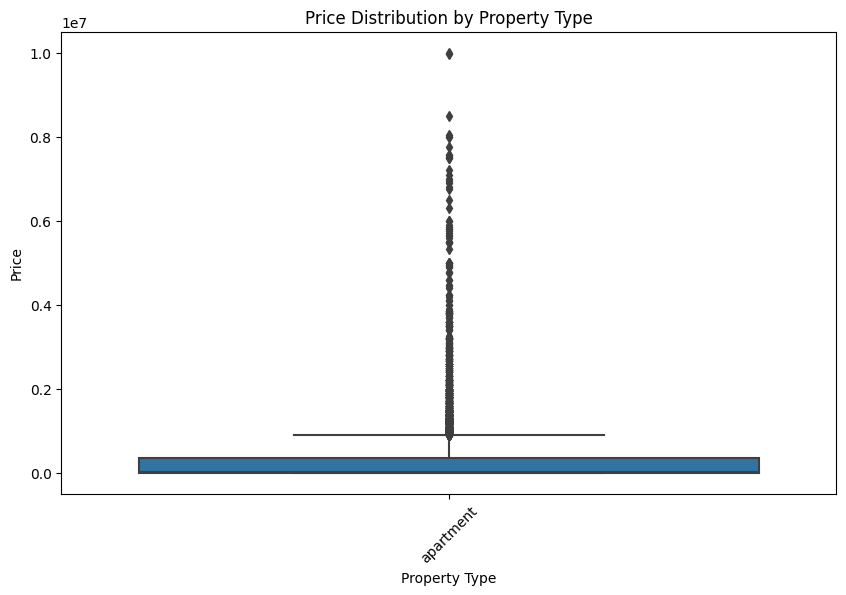

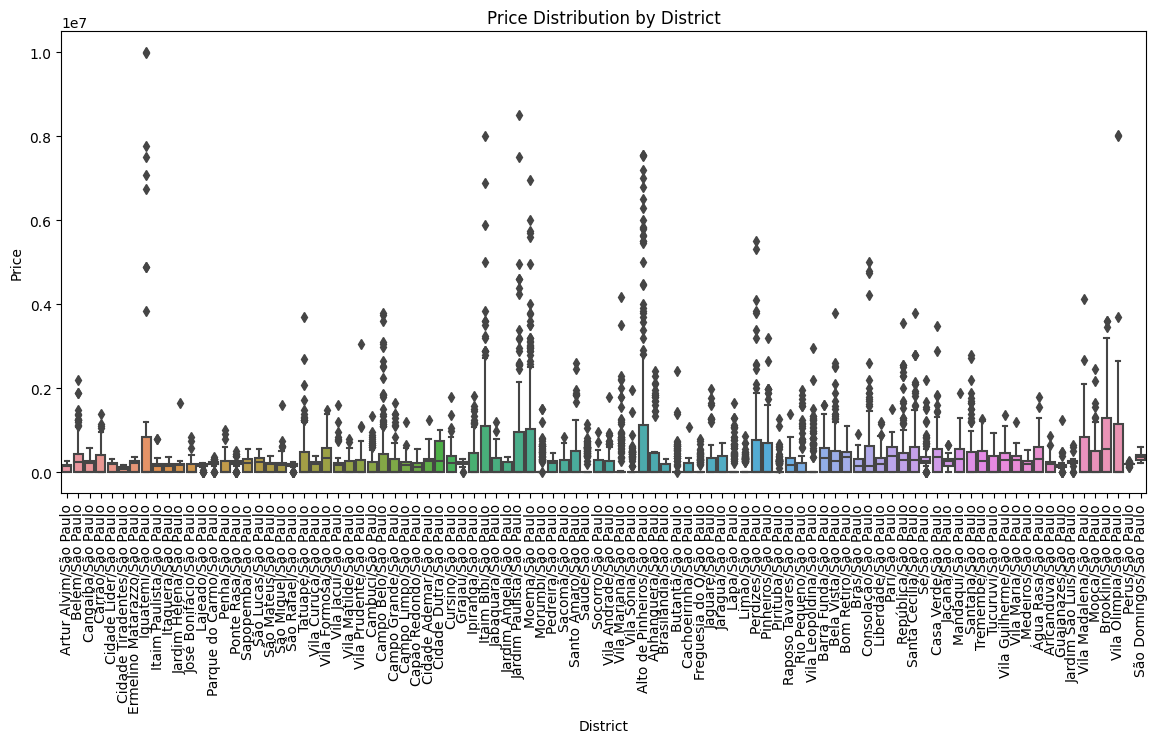

In [ ]:
# Box plot de Price por tipo de propriedade
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property Type', y='Price', data=data)
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)
plt.show()

# Box plot de Price por distrito
plt.figure(figsize=(14, 6))
sns.boxplot(x='District', y='Price', data=data)
plt.title('Price Distribution by District')
plt.xticks(rotation=90)
plt.show()


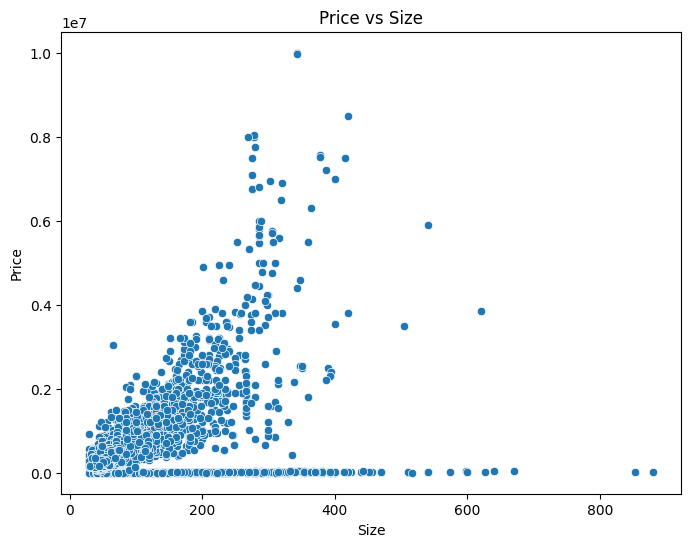

NameError: ignored

In [ ]:
# Scatter plot entre Price e Size
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size', y='Price', data=data)
plt.title('Price vs Size')
plt.show()

# Pairplot para visualizar relações entre múltiplas variáveis numéricas
sns.pairplot(data[numerical_vars])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()


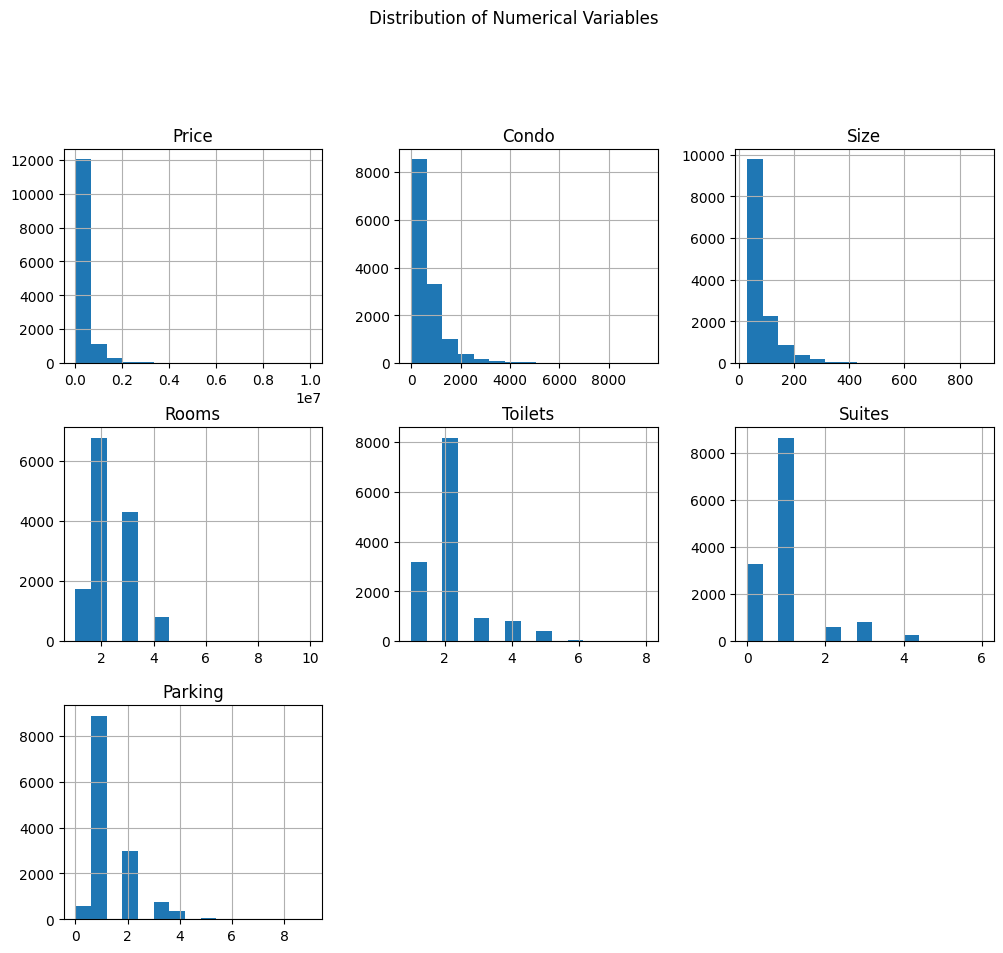

In [ ]:
# Histogramas para variáveis numéricas
numerical_vars = ['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking']
data[numerical_vars].hist(bins=15, figsize=(12, 10))
plt.suptitle("Distribution of Numerical Variables", y=1.02)
plt.show()


In [ ]:
# Contagem de valores em variáveis categóricas
categorical_vars = ['Elevator', 'Furnished', 'Swimming Pool', 'New', 'Negotiation Type', 'Property Type']
for var in categorical_vars:
    print(data[var].value_counts())


0    8809
1    4831
Name: Elevator, dtype: int64
0    11638
1     2002
Name: Furnished, dtype: int64
1    6986
0    6654
Name: Swimming Pool, dtype: int64
0    13427
1      213
Name: New, dtype: int64
rent    7228
sale    6412
Name: Negotiation Type, dtype: int64
apartment    13640
Name: Property Type, dtype: int64


<ipython-input-12-344e39427ae2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


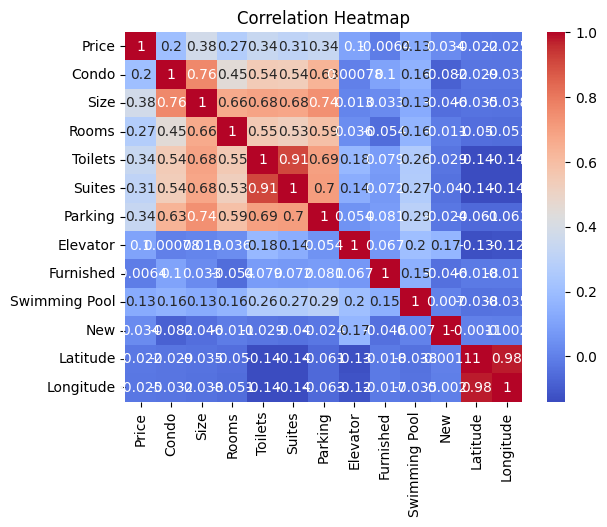

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlação entre variáveis numéricas
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




In [ ]:
# Visualizar as primeiras linhas do DataFrame
print(df.head())

# Obter informações sobre as colunas, tipos de dados e valores não nulos
print(df.info())

# Resumo estatístico das colunas numéricas
print(df.describe())

# Contagem de valores únicos em cada coluna
print(df.nunique())


   Price  Condo  Size  Rooms  Toilets  Suites  Parking  Elevator  Furnished  \
0    930    220    47      2        2       1        1         0          0   
1   1000    148    45      2        2       1        1         0          0   
2   1000    100    48      2        2       1        1         0          0   
3   1000    200    48      2        2       1        1         0          0   
4   1300    410    55      2        2       1        1         1          0   

   Swimming Pool  New               District Negotiation Type Property Type  \
0              0    0  Artur Alvim/São Paulo             rent     apartment   
1              0    0  Artur Alvim/São Paulo             rent     apartment   
2              0    0  Artur Alvim/São Paulo             rent     apartment   
3              0    0  Artur Alvim/São Paulo             rent     apartment   
4              0    0  Artur Alvim/São Paulo             rent     apartment   

    Latitude  Longitude  
0 -23.543138 -46.479486 

In [ ]:
# Verificar valores ausentes em cada coluna
print(data.isnull().sum())

# não há valores nulos


Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64


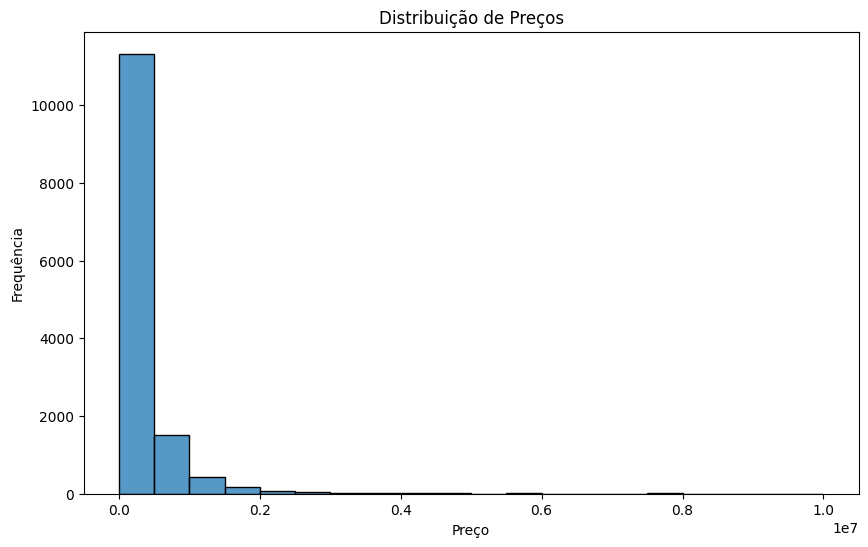

In [ ]:
# Histograma do 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=20)
plt.title("Distribuição de Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

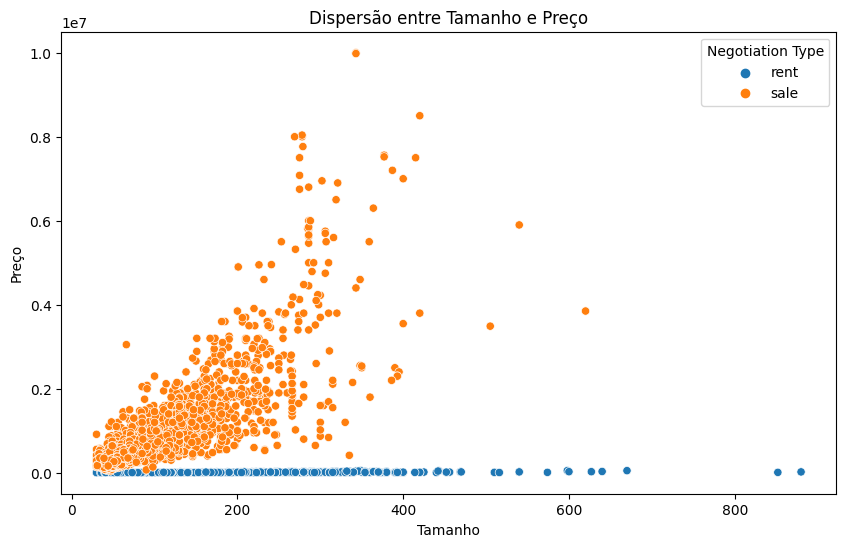

In [ ]:
# Gráfico de dispersão entre 'Size' e 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size', y='Price', hue='Negotiation Type')
plt.title("Dispersão entre Tamanho e Preço")
plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.show()


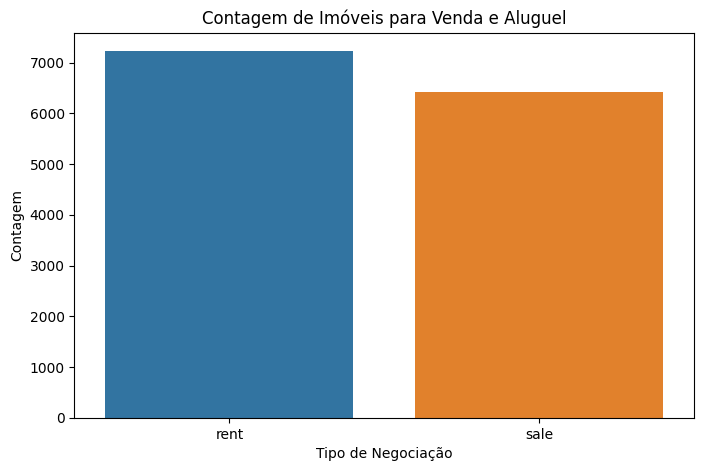

In [ ]:
# Contagem de valores de 'Negotiation Type' (Para Vender ou Para Alugar)
negotiation_counts = df['Negotiation Type'].value_counts()

# Plotar gráfico de contagem
plt.figure(figsize=(8, 5))
sns.barplot(x=negotiation_counts.index, y=negotiation_counts.values)
plt.title("Contagem de Imóveis para Venda e Aluguel")
plt.xlabel("Tipo de Negociação")
plt.ylabel("Contagem")
plt.show()


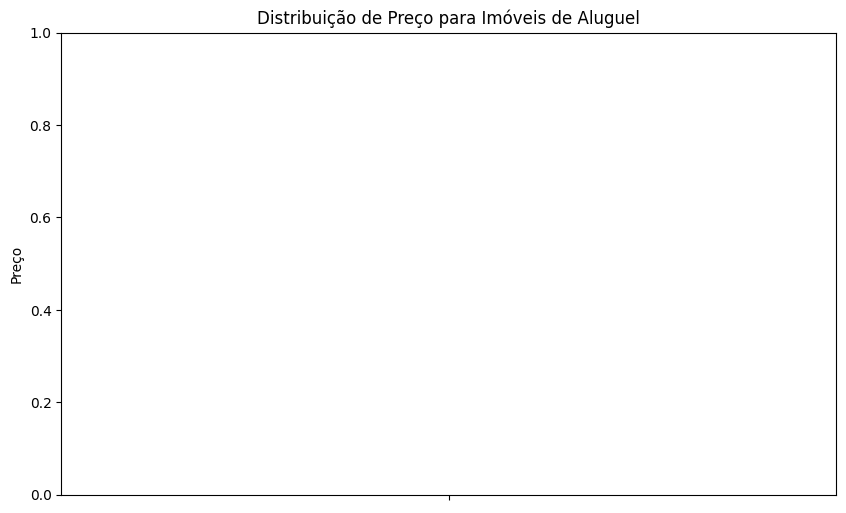

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV para um DataFrame do Pandas
df = pd.read_csv("/sao-paulo-properties-april-2019.csv")

# Filtrar apenas os imóveis para aluguel
aluguel_df = df[df['Negotiation Type'] == 'Para Alugar']

# Gráfico de violino para a distribuição do preço dos imóveis de aluguel
plt.figure(figsize=(10, 6))
sns.violinplot(data=aluguel_df, y='Price')
plt.title("Distribuição de Preço para Imóveis de Aluguel")
plt.ylabel("Preço")
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar o arquivo CSV para um DataFrame do Pandas
df = pd.read_csv("/sao-paulo-properties-april-2019.csv")

# Filtrar apenas os imóveis para aluguel
aluguel_df = df[df['Negotiation Type'] == 'Para Alugar']

# Selecionar as variáveis que você deseja usar para prever o preço
# Vou usar apenas a variável 'Size' neste exemplo
X = aluguel_df[['Size']]
y = aluguel_df['Price']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotar os dados de teste e as previsões
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados de Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title("Regressão Linear para Previsão de Preço")
plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.legend()
plt.show()


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Essas linhas importam as bibliotecas necessárias para trabalhar com dados (Pandas),
# cálculos (NumPy), regressão linear (LinearRegression), métricas de avaliação (mean_squared_error) e visualização (matplotlib.pyplot).



# Carregar o arquivo CSV para um DataFrame do Pandas
df = pd.read_csv("sao-paulo-properties-april-2019.csv")

# Filtrar apenas os imóveis para aluguel. Essa linha filtra o DataFrame original para criar um novo DataFrame chamado aluguel_df, que contém apenas os imóveis disponíveis para aluguel.
aluguel_df = df[df['Negotiation Type'] == 'Para Alugar']

# Selecionar as variáveis que você deseja usar para prever o preço
# Vou usar apenas a variável 'Size' neste exemplo
# Nessas linhas, estamos definindo a variável independente X (tamanho do imóvel) e a variável dependente y (preço do imóvel).
X = aluguel_df[['Size']]
y = aluguel_df['Price']

# Dividir o conjunto de dados em treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear. Aqui, estamos criando uma instância do modelo de regressão linear da biblioteca scikit-learn.
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
#model.fit(X_train, y_train)
model.fit(X, y)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

y_pred = model.predict(X)



# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotar os dados de teste e as previsões
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados de Teste')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title("Regressão Linear para Previsão de Preço")
plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.legend()
plt.show()


ValueError: ignored